#############################################START OF ALGORITHM########################################### 
Class(Object): Person
    Method 1: Masked 
        Attribute 1: Infected? ####Default of using anti-body test, basis of study#### 
            Sub-Attribute 1: Days infected? 
            Sub-Attribute 2: Recovered or Infected? 
        Attribute 2: Not infected?**** COLLECT THE DATA**** 
    Method 2: No Mask
        Attribute 1: Infected? ####Default of using anti-body test, basis of study#### 
            Sub-Attribute 1: Days infected?
            Sub-Attribute 2: Recovered or Infected? 
        Attribute 2: Not infected? ****COLLECT THE DATA****
############################################STOP THE ALGORITHM##############################################

# T.E.M

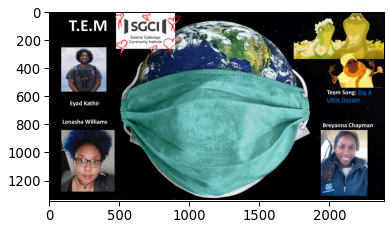

In [15]:
from PIL import Image

img = Image.open("Image.jpeg")
plt.imshow(img)
plt.show()

In [16]:
import random
class Person(object):
    def __init__(frog, days_sick, infection_rate):
        frog.name = ""
        frog.status = "Prone_To"
        frog.days_sick = 0
        frog.days_sick = days_sick
        frog.infection_rate = infection_rate
        frog.interactions = []

    def setStatus(frog, newstatus):
        frog.status = newstatus
        if (frog.status == "Masked"):
            frog.infection_rate = frog.infection_rate/2
            frog.days_sick = frog.days_sick/2
    
    def infect(frog, total_of_days):
        frog.days_sick = total_of_days
        frog.status = "Infected"
        
    def recover(frog):
        frog.days_sick = 0
        frog.status = "Recovered"
    
    def roll_to_infect(frog):
        if (random.randint(0,100) <= frog.infection_rate and (frog.status == "Prone_To" or frog.status == "Masked")):
            frog.infect(frog.days_sick)
                
    def update(frog):
        ##updating this method, only updating days_sick for infected people
        ##if days_sick <= 0, we're going to recover them
        if (frog.status == "Infected"):
            frog.days_sick = frog.days_sick - 1

            if (frog.days_sick <= 0):
                frog.recover()
    
    def infect_other(frog, p):
        if (random.randint(0,20) <= frog.infection_rate):
            p.infect(frog.days_sick)
    
    def reset(frog):
        frog.status = "Prone_To"
        frog.days_sick = 0
        frog.days_sick = 0
        frog.interactions = []

In [17]:
class Population:
    def __init__(frog, total=1000, interactions=10, days_sick=5, infection_rate=10, masked_rate=0):
        frog.People = []
        frog.total = total
        frog.total_of_interactions = interactions
        frog.days_sick = days_sick
        frog.infection_rate = infection_rate
        frog.masked_people = frog.total*masked_rate
        
        if (total < 100):
            frog.total = 100
        
        if (interactions < 10):
            frog.num_of_interactions = 10
        
        ##build our population
        for i in range(0,frog.total):
            p = Person(frog.days_sick, frog.infection_rate)
            p.name = str(i)
            
            ##Person 0 is patient 0, we don't want to vaccinate patient 0
            if ((i+1) < frog.masked_people):
                ### we will vaccinate that person
                p.setStatus("Healthy")
                
            frog.People.append(p)
            
        frog.People[0].infect(days_sick)
    
    def total_of_infected(frog):
        ##infected = []
        sick_count = 0
        for p in frog.People:
            if (p.status == "Infected"):
                ##infected.append(int(p.name))
                sick_count = sick_count + 1
        
        ##print (infected)
        return sick_count
    
    def total_of_recovered(frog):
        ##recovered = []
        recovered_count = 0
        for p in frog.People:
            if (p.status == "Recovered"):
                ##recovered.append(int(p.name))
                recovered_count = recovered_count + 1
        
        ##print (recovered)
        return recovered_count
    
    def total_of_Prone_To(frog):
        Prone_To_count = 0
        for p in frog.People:
            if (p.status == "Prone_To"):
                Prone_To_count = Prone_To_count + 1
        
        return Prone_To_count
    
    
    ### Here's the heart of our People Class
    ### We need an "update" method that gets ran every day
    ### It's going to build a list of people who might be infected because they had
    ### direct contact for an "Infected" person
    
    def update(frog):
        
        possible_infected = []
        
        for person in frog.People:
            
            #clear out the interactions table at the beginning of the day
            person.interactions = []
            
            #build the interactions for each Person
            for i in range(0, frog.total_of_interactions):
                person_index = random.randint(0,(frog.total)-1)
                person.interactions.append(person_index)
                
                ### If "person" is infected, then everyone they had direct contact with might get infected
                if (person.status == "Infected"):
                    possible_infected.append(person_index)
                
                ### If "person" is Prone_To, then if they *interacted* with someone who is infected
                ### they might get sick
                if (person.status == "Prone_To" and frog.People[person_index].status == "Infected"):
                    possible_infected.append(int(person.name))
                    
            ##only need to update a person if they're currently infected
            if (person.status == "Infected"):
                person.update()
                
        ##print ("The following might get sick tomorrow:")
        ##print (possible_infected)
        for person_index in possible_infected:
            frog.People[person_index].roll_to_infect()

In [18]:



myCommunity = Population(1000, 10, 5, 10, .02)
day = 0


while(myCommunity.total_of_infected() > 0):
    day = day + 1
    total_of_infected = myCommunity.total_of_infected()
    total_of_recovered = myCommunity.total_of_recovered()
    
    print ("Day:", day, "Infected:", total_of_infected, " Recovered:", total_of_recovered)
    myCommunity.update()

print ("Day:", day+1, "Infected:", myCommunity.total_of_infected(), " Recovered:", myCommunity.total_of_recovered())
print ("Masked:", myCommunity.masked_people)


Day: 1 Infected: 1  Recovered: 0
Day: 2 Infected: 3  Recovered: 0
Day: 3 Infected: 6  Recovered: 0
Day: 4 Infected: 19  Recovered: 0
Day: 5 Infected: 57  Recovered: 0
Day: 6 Infected: 156  Recovered: 1
Day: 7 Infected: 369  Recovered: 3
Day: 8 Infected: 696  Recovered: 6
Day: 9 Infected: 900  Recovered: 19
Day: 10 Infected: 916  Recovered: 57
Day: 11 Infected: 825  Recovered: 157
Day: 12 Infected: 610  Recovered: 372
Day: 13 Infected: 280  Recovered: 702
Day: 14 Infected: 63  Recovered: 919
Day: 15 Infected: 9  Recovered: 973
Day: 16 Infected: 0  Recovered: 982
Masked: 20.0


# Graphs

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

frog = pd.read_csv('TEM_data.csv', low_memory = False)

In [20]:
#Display all cleaned data
frog.head(52)

,State,adh_APRavg,adh_AUGavg,adh_JULavg,adh_JUNEavg,adh_MAYavg,AdhSEPavg,Pop_2019,PopDensity,Age,...,tot_Cases_Jul,tot_cases_Jun,tot_cases_May,tot_cases_Sep,zcase_rate_Aug,zcase_rate_Jul,zcase_rate_Jun,zcase_rate_May,zcase_rate_Sep,zMaskPolStart
0,Alabama,24.67,65.354839,62.677419,27.60,30.13,59.83,4903185,94.40,39.3,...,87867,38064,18245,154701,778.901877,1015.727532,404.206653,223.099883,584.171309,7/16/2020
1,Alaska,33.30,56.838710,57.451613,46.03,42.42,52.33,731545,1.20,34.9,...,2990,940,460,7824,310.712260,280.228831,65.614555,14.353184,350.080993,4/24/2020
2,Arizona,14.90,87.258065,83.129032,21.77,17.55,67.97,7278717,63.00,38.0,...,174010,79215,19936,218507,382.278910,1302.358644,814.415508,168.820961,229.051356,0
3,Arkansas,27.57,59.000000,58.258065,36.90,38.19,60.20,3017804,56.00,38.1,...,42511,20777,7253,83697,620.086659,720.192564,448.140436,132.480439,744.680569,7/20/2020
4,California,38.07,74.612903,74.290323,48.70,45.23,72.47,39512223,251.30,36.7,...,493588,222917,110583,810625,532.738945,685.031060,284.301898,156.068162,269.638081,6/18/2020
5,Colorado,31.10,61.709677,61.129032,48.00,45.71,63.57,5758736,52.00,36.9,...,46809,32715,26378,70536,184.328644,244.741207,110.041509,194.417664,227.688854,7/16/2020
6,Connecticut,22.97,73.354839,78.548387,55.40,47.68,71.37,3565287,738.10,41.1,...,49810,46514,42201,57550,86.080027,92.446976,120.972028,406.727425,131.013296,4/20/2020
7,Delaware,25.47,68.419355,65.741935,39.83,36.39,70.90,973764,460.80,41.1,...,14877,11510,9606,20613,272.961416,345.771665,195.529923,500.326568,316.093016,4/28/2020
8,District of Columbia,25.63,71.774194,69.387097,39.87,36.39,72.33,705749,10298.00,33.9,...,12126,10327,8801,15326,264.399950,254.906489,216.224182,634.503202,189.019042,4/17/2020
9,Florida,35.03,71.645161,66.903226,45.10,43.45,65.93,21477737,353.40,42.2,...,465030,149781,54764,698051,705.842520,1467.794303,442.397632,98.120207,379.099530,0


<Figure size 576x288 with 0 Axes>

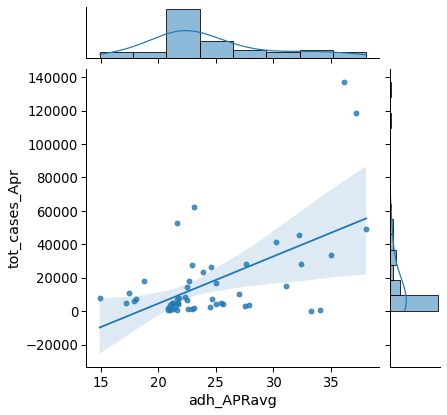

In [21]:
#JointPlot of April
sns.set_context('paper',font_scale=1.5)
plt.figure(figsize = (8,4))
sns.jointplot(x='adh_APRavg',y='tot_cases_Apr',data=frog, kind= 'reg')
sns.despine(left=False)

#Compromises 3 plots
#Main plot shows how dependent variable varies with independent variable (adh)
#Top shows distribution of independent variable
#Side plot shows 'x' and 'y' comparison

<Figure size 576x288 with 0 Axes>

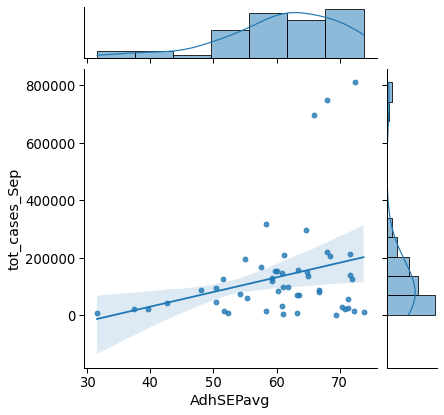

In [22]:
#JointPlot September
sns.set_context('paper',font_scale=1.5)
plt.figure(figsize = (8,4))
sns.jointplot(x='AdhSEPavg',y='tot_cases_Sep',data=frog, kind= 'reg')
sns.despine(left=False)


#Compromises 3 plots
#Main plot shows how dependent variable varies with independent variable (adh)
#Top shows distribution of independent variable
#Side plot shows 'x' and 'y' comparison

<AxesSubplot:xlabel='adh_JUNEavg', ylabel='tot_cases_Jun'>

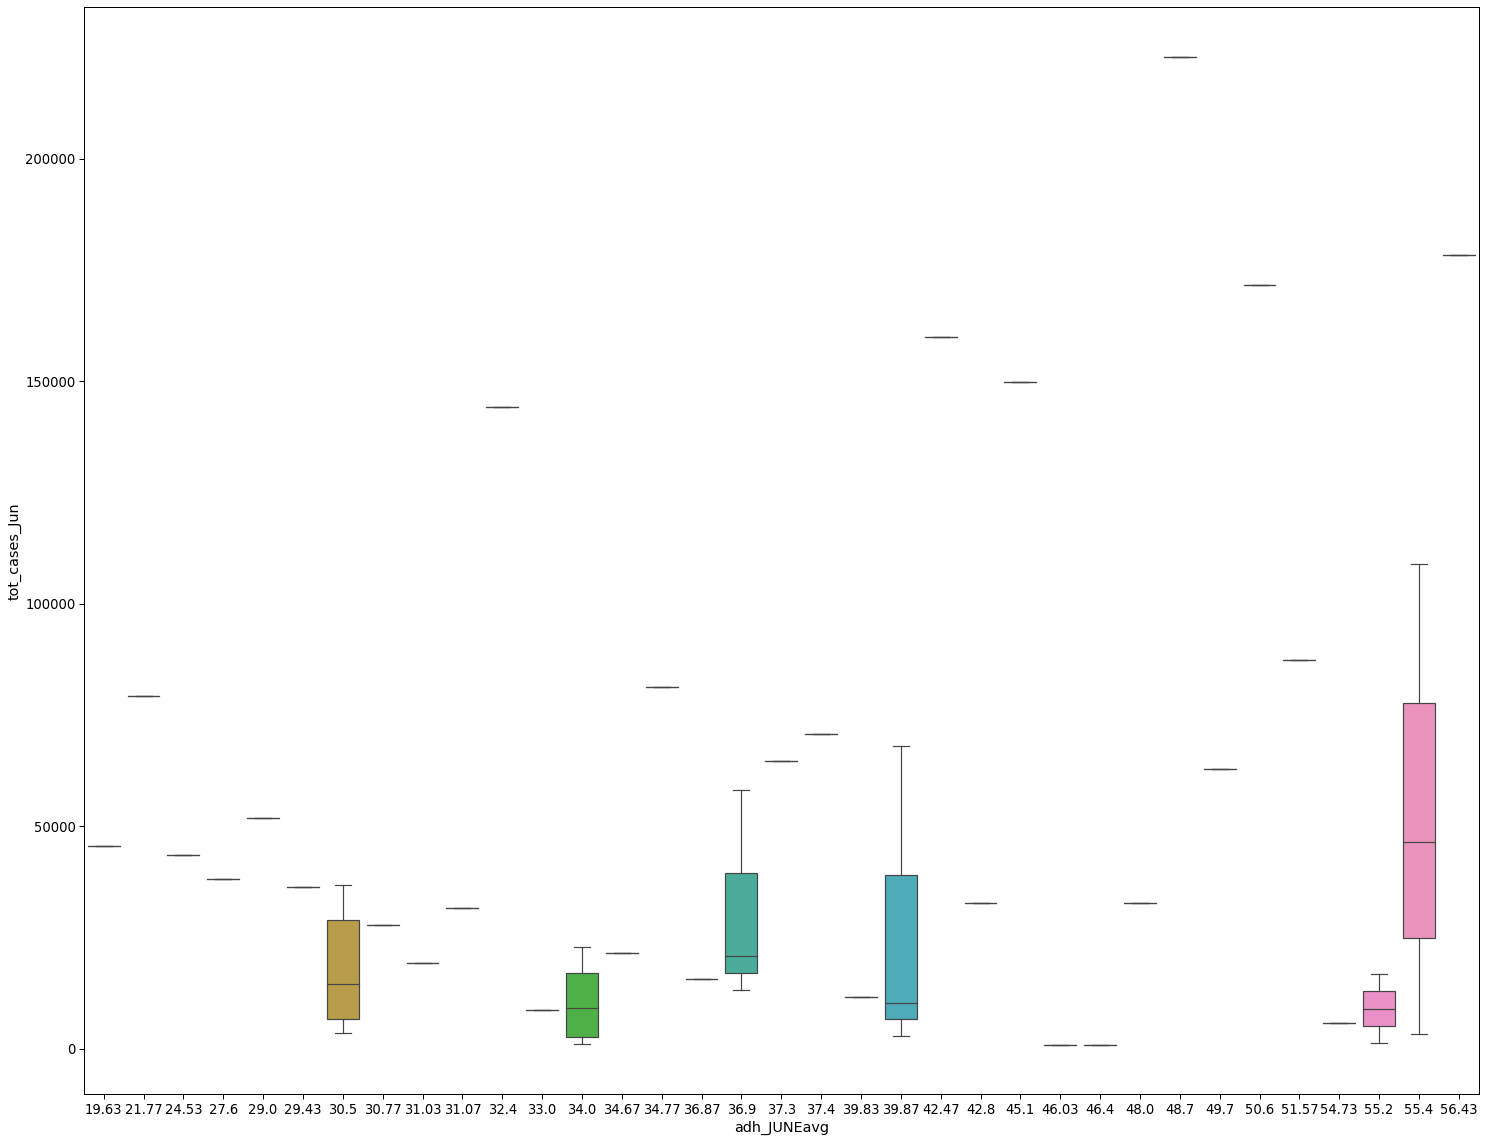

In [23]:
plt.figure(figsize = (25,20))
sns.boxplot(x='adh_JUNEavg',y='tot_cases_Jun', data=frog)

#Median
#Lower Quartile, adh variable on x-axis and real total of y-axis

<AxesSubplot:xlabel='adh_MAYavg', ylabel='tot_cases_May'>

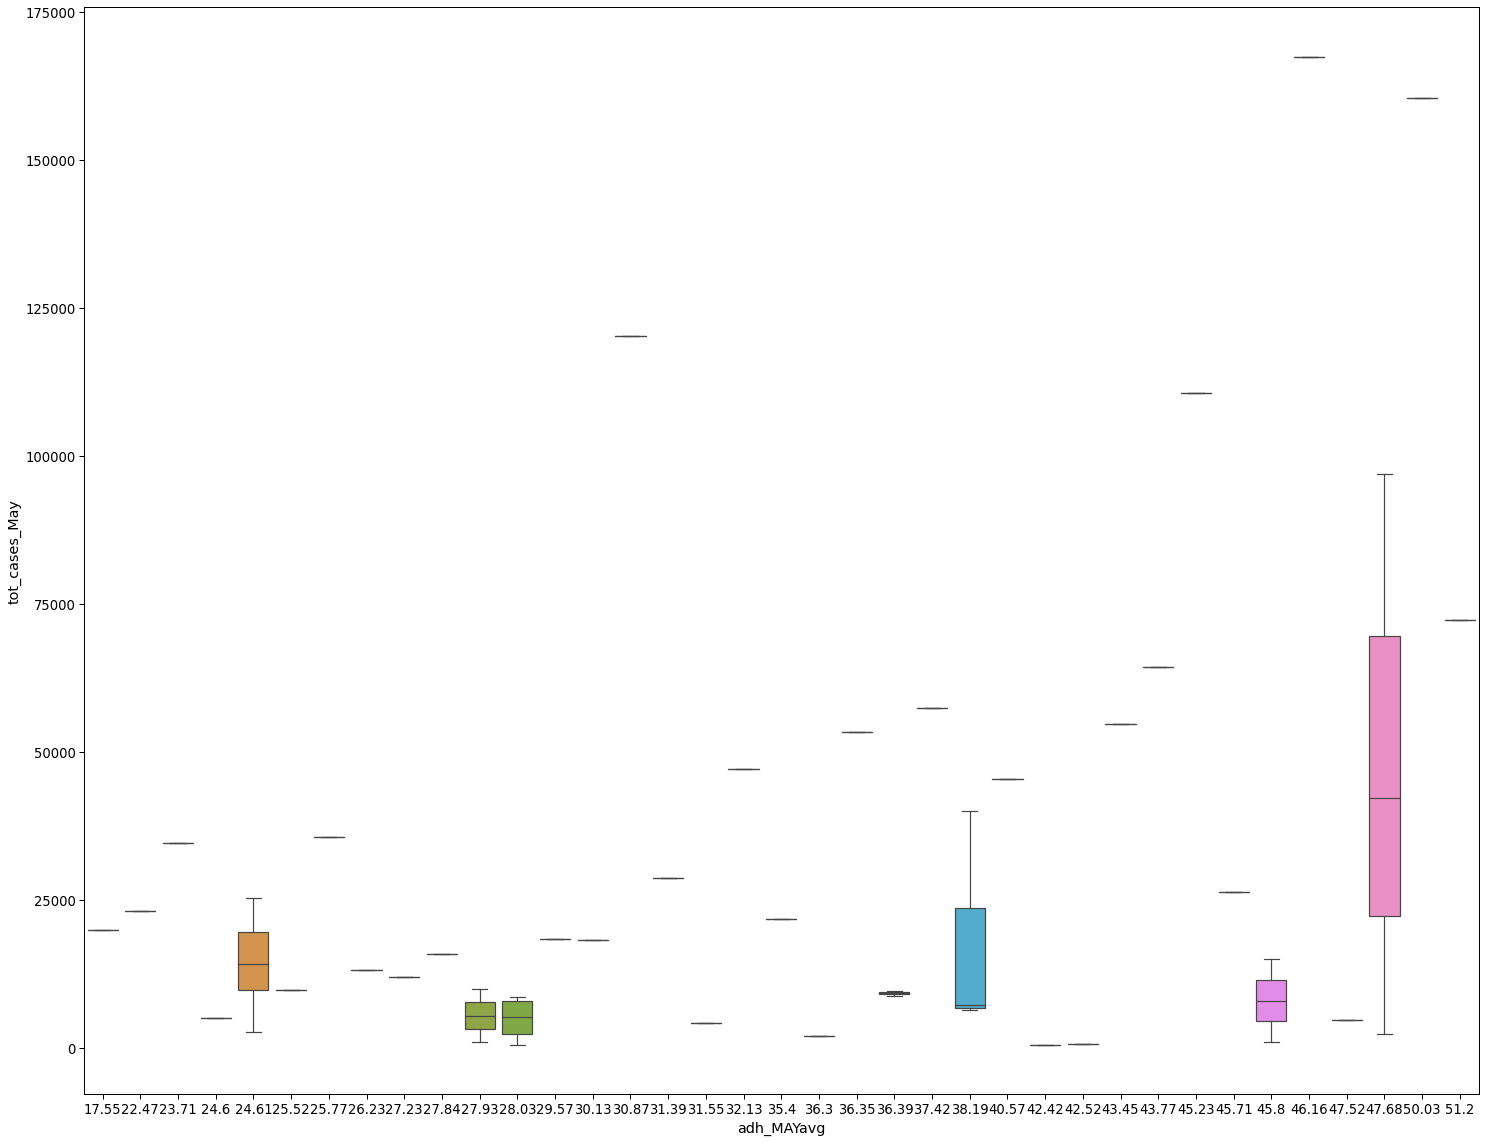

In [24]:
plt.figure(figsize = (25,20))
sns.boxplot(x='adh_MAYavg',y='tot_cases_May', data=frog)

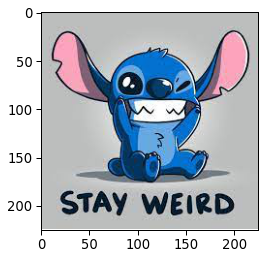

In [25]:
from PIL import Image

img = Image.open("download.jpg")
plt.imshow(img)
plt.show()